# **پروژه اول درس یادگیری عمیق**

---
 fateme padkan 
970122681002


---

###  ◼ Preprocessing  

In [ ]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

!gdown --id 1-Zyp-JP3f9QhPKaErBkPPFNKaPS1v74u

categorical_attr = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-Zyp-JP3f9QhPKaErBkPPFNKaPS1v74u
To: /content/Dataset.csv
100% 38.0k/38.0k [00:00<00:00, 2.43MB/s]


In [ ]:
df = pd.read_csv('/content/Dataset.csv')
df.head()


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
print(df.shape)

(480, 17)


In [ ]:
# Converting Categorical values to scaler values
le = LabelEncoder()
df[categorical_attr] = df[categorical_attr].apply(le.fit_transform, axis=0)

In [ ]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


In [ ]:
# X: Features, y: Classes
X = np.array(df.iloc[:, :-1])
y = np.array(df['Class'])


### ◼ lables must  be 0 or 1


In [ ]:
temp=np.amax(X, axis=0)
X= X/temp

for i in range(0,len(y)) : #H,M pass    L=fail
  
  if y[i]>0 :
     y[i]=1
  else :
     y[i]=0


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)
X_train = X_train.T
X_val = X_val.T
y_train = y_train.T.reshape(1, len(y_train))
y_val = y_val.T.reshape(1, len(y_val))

In [ ]:
print('Number of dataset: ', len(X))
print('Number of train set: ', len(X_train))
print('Number of validation set: ', len(X_val))

Number of dataset:  480
Number of train set:  16
Number of validation set:  16


### ◼ math utils


In [ ]:

def sigmoid(Z):

    A = 1/(1+np.exp(-Z))  
    return A



def sigmoid_backward(dA, cache):
   
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    
    return dZ

def relu(Z):
    A=np.where(np.asarray(Z) > 0, Z, 0)
    
    return A
def relu_backward(dA, cache):
   
    Z = cache
    dZ = np.array(dA, copy=True) 
    
    dZ[Z <= 0] = 0
        
    return dZ




### ◼ *in predict function :* 


⭕ **converting output of forward function to 0,1** 


> input:

*  shape : shape of train or validation data . 

 ✅    we need it for making a predict matrix which is [1][shape[1]]



*   Y : train or validation Y

*    output: output of forward prpopagation 





> output:

* p : predict matrix 














In [ ]:
def predict( shape,Y, output):
    p = np.zeros((1,shape[1]))
    for i in range(0, output.shape[1]):
        if output[0,i] > 0.5:
            p[0][i] = 1
        else:
            p[0][i] = 0
                   
    return p

### ◼ forward Function for l layer:

 

> input:

*  X: data 
*  n:number of layers
*  parameters : w and b (output of initilizer) 



other params :

*  A_prev: X or A (activation) of a prev layer
*  w : weight  
*  b : bias
* activationType : relu or tanh or sigmoid 

* A :  the output of the activation function 

* A_W_B_Z_dict: a dictionary with A,W,b,Z




> 
1.  for each layer z :  z(l)=W(l)A(l-1)+b(l)







In [ ]:

def forwardFunction(X,n, parameters):
    caches = []
    A = X
    L = n-1    
    for l in range(1, L):
        previousA = A
        W=parameters['W' + str(l)]
        b=parameters['b' + str(l)]
        A_W_b_dict = (previousA, W, b)
        Z = np.dot(W, previousA) + b #linear part
        A = relu(Z)    #non linear      
        A_W_B_Z_dict = (A_W_b_dict, Z)
        caches.append(A_W_B_Z_dict)


    W=parameters['W' + str(L)]
    b=parameters['b' + str(L)]
    Z = np.dot(W, A) + b
    A_W_b_dict = (A, W, b)
    AL = sigmoid(Z)
    A_W_B_Z_dict = (A_W_b_dict, Z)

  
    caches.append(A_W_B_Z_dict)

    return AL, caches


### ◼ compute cost function 


 
*compute_cost :*

> input:

*  AL  : probability vector  and from forward function 
*  Y


> output:

* cost 




In [ ]:

def compute_cost(AL, Y):
    m = Y.shape[1]
    cost = (-1/m) * (np.dot(Y, np.log(AL).T) + np.dot((1-Y), np.log(1-AL).T))
    return cost

### ◼ backward propagation


In [ ]:

def backwardFunction(AL, Y, caches):

    L = len(caches) 
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) 
    gradiants = {}  #gradiant of the loss function


    current_cache = caches[L-1]  
    AWB, Z = current_cache

    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))  ## derivative of cost with respect to AL
    dZ = sigmoid_backward(dAL, Z)  #dz(l)=dA(l)*g'(z(l))

    A_prev, W, b = AWB
    m = A_prev.shape[1]
    dW = (1/m) * np.dot(dZ, A_prev.T)
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)        

    gradiants["dA" + str(L-1)]=dA_prev
    gradiants["dW" + str(L)]=dW
    gradiants["db" + str(L)]=db         
 

    for l in reversed(range(L-1)):

        current_cache = caches[l]
        
        AWB, Z = current_cache

        dZ = relu_backward( gradiants["dA" + str(l + 1)], Z)

        A_prev, W, b = AWB
        m = A_prev.shape[1]
        dW = (1/m) * np.dot(dZ, A_prev.T)
        db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(W.T, dZ)

        gradiants["dA" + str(l)] = dA_prev
        gradiants["dW" + str(l + 1)] = dW
        gradiants["db" + str(l + 1)] = db

    return gradiants

### ◼ update the parameters of the model, using gradient descent


*  w(l)=w(l)- lr_rate*dw(l)


*  b(l)=b(l)- lr_rate*db(l)

In [ ]:

def update_parameters(parameters,dims, grads, learning_rate):

    L = len(dims)-1
  
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] -  learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    return parameters


### ◼ function for implementring model


### *in initializer function :* 

⭕ **first inititalize nueral network ** 

⬜ random initializer for random w and b  and zero initializer for zero w and b

* w_b_dict : a dictionary with W and b

* layersNum: number of layers 






In [ ]:
def implementNetwork(X, Y ,X_val, Y_val, layers_dims, lr_rate = 0.1,randomInit=1, itersNum = 1000):#lr was 0.009

    np.random.seed(1)
    itersValues=[]
    dims=layers_dims
    trainShape=X.shape
    validatonShape=X_val.shape
    
    n = len(layers_dims) 
    print(n,"layer")

    
    w_b_dict = {}

    if randomInit==1 :

      np.random.seed(3)

      for l in range(1, len(dims)):  # from 1 to number of layers
          w_b_dict['W' + str(l)] = np.random.randn(dims[l],
                                                    dims[l-1]) * 0.01
          w_b_dict["b" + str(l)] = np.random.randn(dims[l ], 1) * 0.01

      layersNum=len(dims)
      parameters=w_b_dict;

    else :


      for l in range(1, len(dims)):  # from 1 to number of layers
        w_b_dict['W' + str(l)] =np.zeros((dims[l], dims[l-1]))
        w_b_dict["b" + str(l)] = np.zeros((dims[l ], 1)) 

      layersNum=len(dims)
      parameters=w_b_dict;
     
    trainLoss=[]
    validationLoss=[]
    trainAccu=[]
    validationAccu=[]
    for i in range(0, itersNum):

       
        AL,cachedValues = forwardFunction(X,n, parameters)
     
        cost = compute_cost(AL, Y)
       
        grads = backwardFunction(AL, Y,cachedValues)
        
        parameters = update_parameters(parameters,dims, grads, lr_rate)
      


        if   i % 100 == 0:

           

            validationOutput,chaches = forwardFunction(X_val,n, parameters)

            predict_train =predict(trainShape,Y,AL)
            predict_val = predict(validatonShape,Y_val,validationOutput)

             
            computeTrainLoss=(compute_cost(AL, Y)[0])
            trainLoss.append(computeTrainLoss[0])
            
            computeValidationLoss=(compute_cost(validationOutput, Y_val)[0])
            validationLoss.append(computeValidationLoss[0])

    
            #percentage of true predictions
            trainAccu.append(np.sum((predict_train == Y)/trainShape[1]))
            validationAccu.append(np.sum((predict_val == Y_val)/validatonShape[1]))

            itersValues.append(i)


        
  
   
    print("trainLoss",trainLoss)
    print("validationLoss",validationLoss)
    print("trainAccuracy",validationLoss)
    print("validationAccuracy",validationAccu)

    i=trainLoss.index(np.sort(trainLoss)[0])
    print("\n \nfor best trainLoss \ntrainloss ",trainLoss[i])
    print("trainAccuracy",trainAccu[i],"\n")

    i=validationLoss.index(np.sort(validationLoss)[0])
    print("\n \nfor best validation loss \nvalidation loss ",validationLoss[i])
    print("validation Accuracy",validationAccu[i],"\n")

    i=trainAccu.index(np.sort(trainAccu)[-1])
    print("\n \nfor best trainAccuracy  \ntrainAccuracy",trainAccu[i])
    print("trainLoss",trainLoss[i],"\n")

    i=validationAccu.index(np.sort(validationAccu)[-1])
    print("\n \nfor best validationAccuracy  \nvalidationAccu",validationAccu[i])
    print("trainLoss",trainLoss[i],"\n")

    

    
    
    
    return itersValues,trainLoss,validationLoss,trainAccu,validationAccu

### ◼ drawing graph function

In [ ]:
def draw_pot(title,iters,trainLoss,validationLoss,trainAccu,validationAccu):
    fig, axs = plt.subplots(2, 2, figsize=(20, 10))

    x = np.squeeze(iters)
    axs[0, 0].plot(x,np.squeeze(trainAccu))
    axs[0, 0].set_title('Accuracy train')
    axs[0, 1].plot(x,trainLoss, 'tab:orange')
    axs[0, 1].set_title('loss train')
    axs[1, 0].plot(x, np.squeeze(validationAccu), 'tab:green')
    axs[1, 0].set_title('Accuracy val')
    axs[1, 1].plot(x, validationLoss, 'tab:red')
    axs[1, 1].set_title('loss val')
    plt.suptitle(title, fontsize=20, fontweight='bold')
    for ax in axs.flat:
        ax.set(xlabel='Itration', ylabel='Percentage', ylim=[0, 1])

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    # for ax in axs.flat:
    #     ax.label_outer()

### ◼ call implement model function

### 2 layer random initialization

In [ ]:
iters,trainLoss,validationLoss,trainAccu,validationAccu = implementNetwork(X_train, y_train,X_val,y_val, [16, 1], itersNum = 1000)


2 layer
trainLoss [0.6936859367161485, 0.46167168355550353, 0.41250670725995975, 0.3885543710389004, 0.37351830568280076, 0.3627939182923593, 0.35458115247816646, 0.34801111744449403, 0.342599447463595, 0.3380474939197057]
validationLoss [0.6878179498182379, 0.5487724471458746, 0.49782653564337587, 0.4749133744543341, 0.46187343660056684, 0.45352575109831694, 0.4478305242462689, 0.4438018364769299, 0.44089352718779107, 0.4387736024983775]
trainAccuracy [0.6878179498182379, 0.5487724471458746, 0.49782653564337587, 0.4749133744543341, 0.46187343660056684, 0.45352575109831694, 0.4478305242462689, 0.4438018364769299, 0.44089352718779107, 0.4387736024983775]
validationAccuracy [0.59375, 0.7083333333333334, 0.7291666666666667, 0.7604166666666666, 0.7708333333333333, 0.78125, 0.7916666666666667, 0.8020833333333334, 0.8020833333333334, 0.8125]

 
for best trainLoss 
trainloss  0.3380474939197057
trainAccuracy 0.8359375 


 
for best validation loss 
validation loss  0.4387736024983775
validati

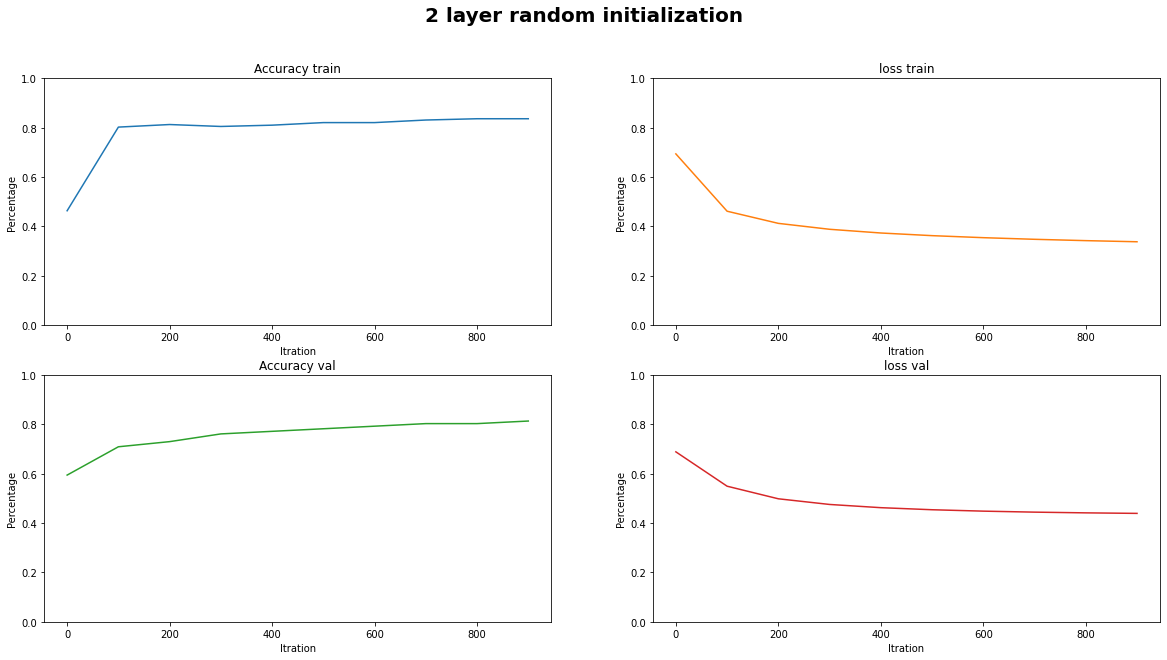

In [ ]:
draw_pot("2 layer random initialization",iters,trainLoss,validationLoss,trainAccu,validationAccu)

In [ ]:
iters,trainLoss,validationLoss,trainAccu,validationAccu = implementNetwork(X_train, y_train,X_val,y_val, [16,25, 1], itersNum = 1000)


3 layer
trainLoss [0.692044999670896, 0.5762911385815827, 0.5252652906507949, 0.39056478461254895, 0.3389952553145704, 0.31873979691878884, 0.3082017854351299, 0.3022650875964206, 0.29877309331771207, 0.2966744143761594]
validationLoss [0.6906726841194886, 0.6999464767788892, 0.6588434837451805, 0.48452455307708675, 0.43819856288362813, 0.4318155084458171, 0.4345624644365052, 0.43923722246189034, 0.44371892942929014, 0.44768835220690156]
trainAccuracy [0.6906726841194886, 0.6999464767788892, 0.6588434837451805, 0.48452455307708675, 0.43819856288362813, 0.4318155084458171, 0.4345624644365052, 0.43923722246189034, 0.44371892942929014, 0.44768835220690156]
validationAccuracy [0.59375, 0.59375, 0.59375, 0.7291666666666666, 0.7916666666666667, 0.8125, 0.8020833333333333, 0.8125, 0.8020833333333334, 0.8020833333333334]

 
for best trainLoss 
trainloss  0.2966744143761594
trainAccuracy 0.8619791666666666 


 
for best validation loss 
validation loss  0.4318155084458171
validation Accuracy 0.

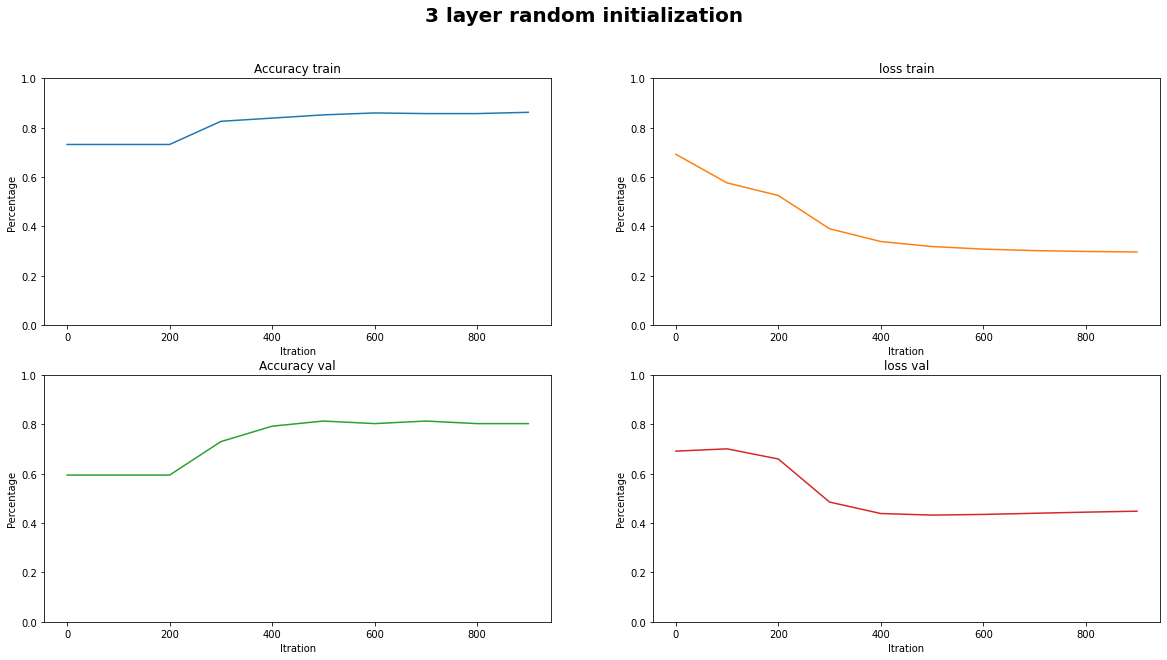

In [ ]:
draw_pot("3 layer random initialization",iters,trainLoss,validationLoss,trainAccu,validationAccu)


In [ ]:
iters,trainLoss,validationLoss,trainAccu,validationAccu = implementNetwork(X_train, y_train,X_val,y_val, [16,25,52,26, 1], itersNum = 1000)


5 layer
trainLoss [0.6905746943937583, 0.5828118327328489, 0.5815126848192232, 0.5814899627518391, 0.5814895372977732, 0.5814895214280323, 0.5814895159602556, 0.5814895118708573, 0.5814895079783767, 0.5814895040034584]
validationLoss [0.6900941384179446, 0.7057191817154164, 0.717958000101999, 0.7197292797789554, 0.7199724088118116, 0.7200055724782081, 0.720010095334078, 0.7200107122812027, 0.7200107959235507, 0.7200108068307192]
trainAccuracy [0.6900941384179446, 0.7057191817154164, 0.717958000101999, 0.7197292797789554, 0.7199724088118116, 0.7200055724782081, 0.720010095334078, 0.7200107122812027, 0.7200107959235507, 0.7200108068307192]
validationAccuracy [0.59375, 0.59375, 0.59375, 0.59375, 0.59375, 0.59375, 0.59375, 0.59375, 0.59375, 0.59375]

 
for best trainLoss 
trainloss  0.5814895040034584
trainAccuracy 0.7317708333333333 


 
for best validation loss 
validation loss  0.6900941384179446
validation Accuracy 0.59375 


 
for best trainAccuracy  
trainAccuracy 0.7317708333333333


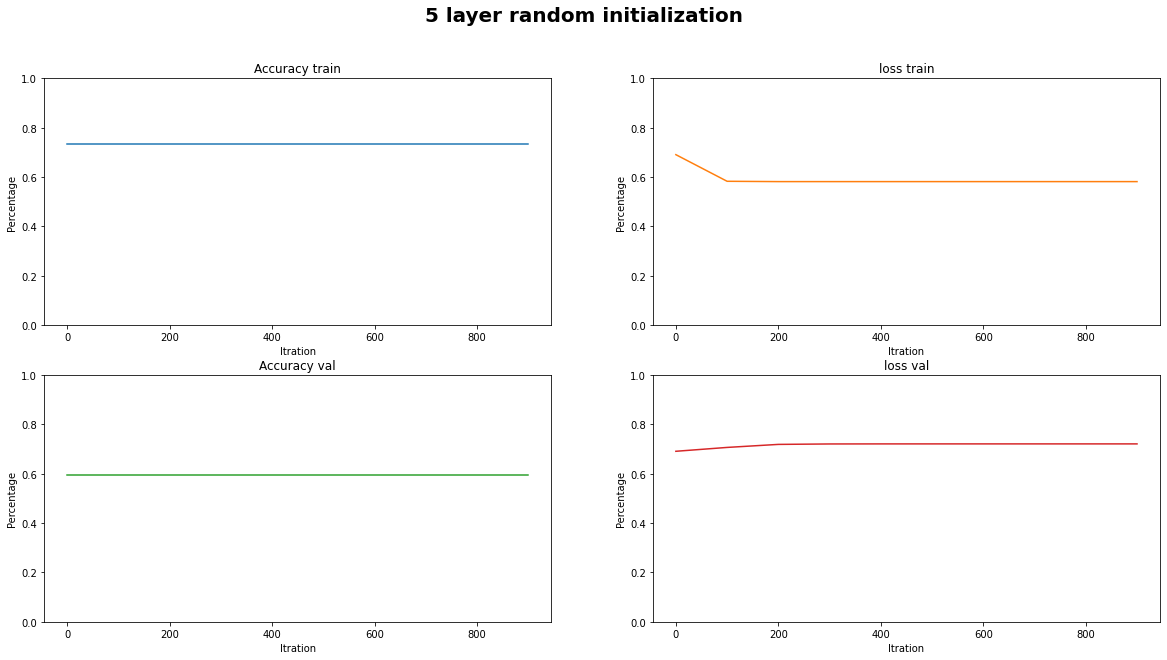

In [ ]:
draw_pot("5 layer random initialization",iters,trainLoss,validationLoss,trainAccu,validationAccu)


In [ ]:
iters,trainLoss,validationLoss,trainAccu,validationAccu = implementNetwork(X_train, y_train,X_val,y_val, [16, 1],randomInit=0, itersNum = 1000)


2 layer
trainLoss [0.6931471805599452, 0.46144960049106115, 0.4122574311755374, 0.3883387187118766, 0.3733395072310082, 0.3626461276375533, 0.3544582043719487, 0.3479079879286152, 0.3425122562186079, 0.33797326282324575]
validationLoss [0.6880968167370585, 0.5484632574785481, 0.4975394253424857, 0.47470808624007876, 0.4617380488848315, 0.45344186089791416, 0.4477832018330741, 0.44378024502825913, 0.4408900263906812, 0.43878283197781937]
trainAccuracy [0.6880968167370585, 0.5484632574785481, 0.4975394253424857, 0.47470808624007876, 0.4617380488848315, 0.45344186089791416, 0.4477832018330741, 0.44378024502825913, 0.4408900263906812, 0.43878283197781937]
validationAccuracy [0.59375, 0.7083333333333334, 0.7291666666666667, 0.7604166666666667, 0.7708333333333333, 0.78125, 0.7916666666666667, 0.8020833333333334, 0.8020833333333334, 0.8125]

 
for best trainLoss 
trainloss  0.33797326282324575
trainAccuracy 0.8359375 


 
for best validation loss 
validation loss  0.43878283197781937
validati

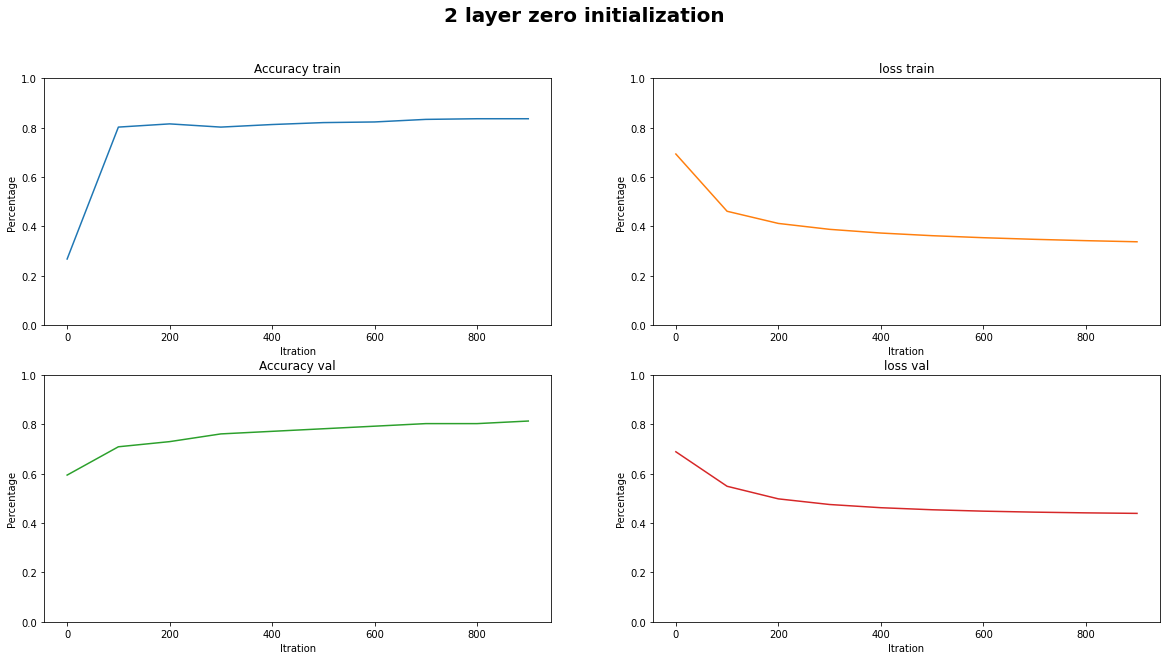

In [ ]:
draw_pot("2 layer zero initialization",iters,trainLoss,validationLoss,trainAccu,validationAccu)


In [ ]:
iters,trainLoss,validationLoss,trainAccu,validationAccu = implementNetwork(X_train, y_train,X_val,y_val, [16,25, 1],randomInit=0, itersNum = 1000)


3 layer
trainLoss [0.6931471805599452, 0.582855331239272, 0.5815139203797091, 0.5814900215866725, 0.5814895720264031, 0.5814895635065576, 0.5814895633449282, 0.5814895633418616, 0.5814895633418034, 0.5814895633418021]
validationLoss [0.691041474643566, 0.7055082426456362, 0.7179052791436288, 0.7197189209030622, 0.7199705737747442, 0.7200052722969496, 0.7200100525377378, 0.7200107110103225, 0.720010801712689, 0.7200108142066048]
trainAccuracy [0.691041474643566, 0.7055082426456362, 0.7179052791436288, 0.7197189209030622, 0.7199705737747442, 0.7200052722969496, 0.7200100525377378, 0.7200107110103225, 0.720010801712689, 0.7200108142066048]
validationAccuracy [0.59375, 0.59375, 0.59375, 0.59375, 0.59375, 0.59375, 0.59375, 0.59375, 0.59375, 0.59375]

 
for best trainLoss 
trainloss  0.5814895633418021
trainAccuracy 0.7317708333333333 


 
for best validation loss 
validation loss  0.691041474643566
validation Accuracy 0.59375 


 
for best trainAccuracy  
trainAccuracy 0.7317708333333333
tr

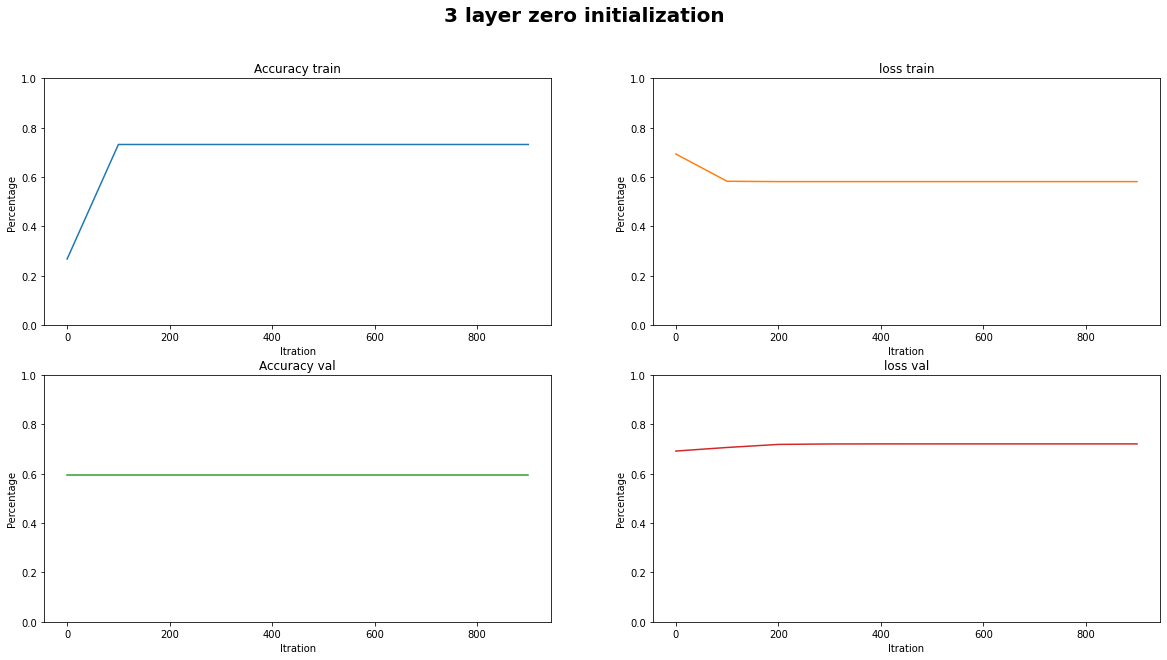

In [ ]:
draw_pot("3 layer zero initialization",iters,trainLoss,validationLoss,trainAccu,validationAccu)


In [ ]:
iters,trainLoss,validationLoss,trainAccu,validationAccu = implementNetwork(X_train, y_train,X_val,y_val, [16,25,52,26, 1],randomInit=0, itersNum = 1000)


5 layer
trainLoss [0.6931471805599452, 0.582855331239272, 0.5815139203797091, 0.5814900215866725, 0.5814895720264031, 0.5814895635065576, 0.5814895633449282, 0.5814895633418616, 0.5814895633418034, 0.5814895633418021]
validationLoss [0.691041474643566, 0.7055082426456362, 0.7179052791436288, 0.7197189209030622, 0.7199705737747442, 0.7200052722969496, 0.7200100525377378, 0.7200107110103225, 0.720010801712689, 0.7200108142066048]
trainAccuracy [0.691041474643566, 0.7055082426456362, 0.7179052791436288, 0.7197189209030622, 0.7199705737747442, 0.7200052722969496, 0.7200100525377378, 0.7200107110103225, 0.720010801712689, 0.7200108142066048]
validationAccuracy [0.59375, 0.59375, 0.59375, 0.59375, 0.59375, 0.59375, 0.59375, 0.59375, 0.59375, 0.59375]

 
for best trainLoss 
trainloss  0.5814895633418021
trainAccuracy 0.7317708333333333 


 
for best validation loss 
validation loss  0.691041474643566
validation Accuracy 0.59375 


 
for best trainAccuracy  
trainAccuracy 0.7317708333333333
tr

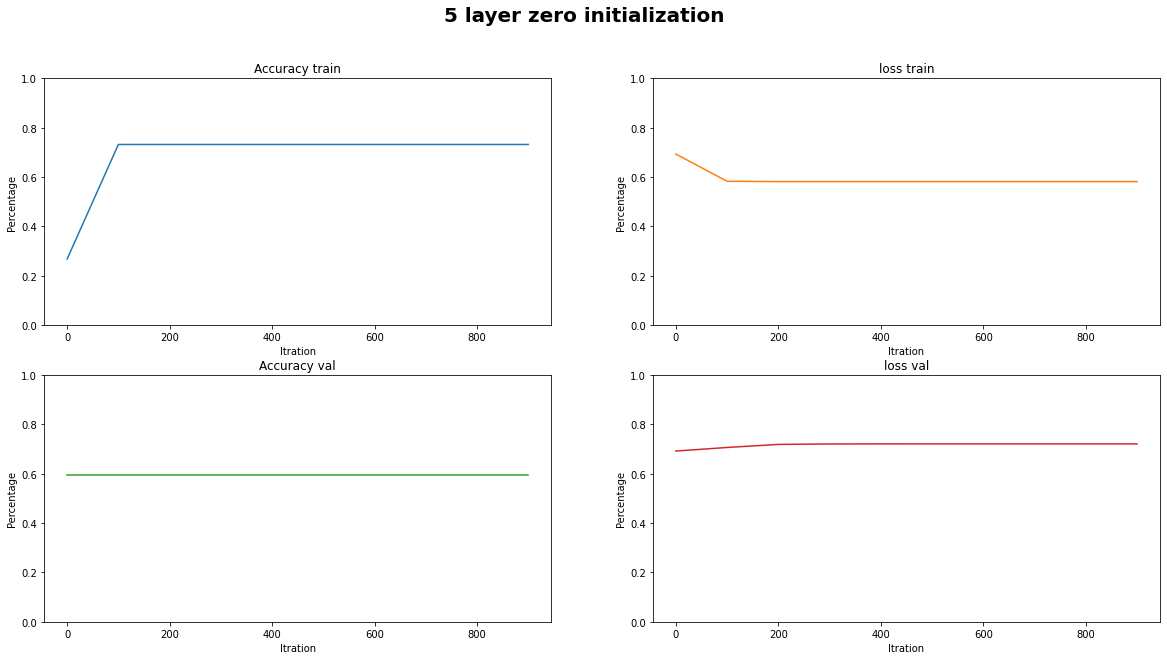

In [ ]:
draw_pot("5 layer zero initialization",iters,trainLoss,validationLoss,trainAccu,validationAccu)
